# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [1]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [2]:
vocab = set()
for doc in documents:
    print(doc)
    for word in doc.lower().strip('.').split(sep=" "):
        vocab.add(word)

print(vocab)
print(len(vocab))

El gato se escondió debajo de la cama.
La cama estaba limpia y cómoda.
El perro y el gato jugaron en el jardín.
La limpieza del jardín es importante.
{'jardín', 'debajo', 'cama', 'la', 'y', 'el', 'jugaron', 'es', 'del', 'de', 'limpieza', 'gato', 'importante', 'cómoda', 'limpia', 'en', 'perro', 'se', 'estaba', 'escondió'}
20


In [3]:
dict_tf = {}
i=0
for doc in documents:
    diccionario_tfd = {}
    for term in vocab:
        count =  doc.lower().strip('.').count(term) # no se usa el count
        diccionario_tfd[term] = count
    #print(documents, diccionario_tfd)
    dict_tf[i] = diccionario_tfd
    i += 1
print(dict_tf)

{0: {'jardín': 0, 'debajo': 1, 'cama': 1, 'la': 1, 'y': 0, 'el': 1, 'jugaron': 0, 'es': 1, 'del': 0, 'de': 2, 'limpieza': 0, 'gato': 1, 'importante': 0, 'cómoda': 0, 'limpia': 0, 'en': 0, 'perro': 0, 'se': 1, 'estaba': 0, 'escondió': 1}, 1: {'jardín': 0, 'debajo': 0, 'cama': 1, 'la': 1, 'y': 1, 'el': 0, 'jugaron': 0, 'es': 1, 'del': 0, 'de': 0, 'limpieza': 0, 'gato': 0, 'importante': 0, 'cómoda': 1, 'limpia': 1, 'en': 0, 'perro': 0, 'se': 0, 'estaba': 1, 'escondió': 0}, 2: {'jardín': 1, 'debajo': 0, 'cama': 0, 'la': 0, 'y': 1, 'el': 3, 'jugaron': 1, 'es': 0, 'del': 0, 'de': 0, 'limpieza': 0, 'gato': 1, 'importante': 0, 'cómoda': 0, 'limpia': 0, 'en': 1, 'perro': 1, 'se': 0, 'estaba': 0, 'escondió': 0}, 3: {'jardín': 1, 'debajo': 0, 'cama': 0, 'la': 1, 'y': 0, 'el': 1, 'jugaron': 0, 'es': 1, 'del': 1, 'de': 1, 'limpieza': 1, 'gato': 0, 'importante': 1, 'cómoda': 0, 'limpia': 0, 'en': 0, 'perro': 0, 'se': 0, 'estaba': 0, 'escondió': 0}}


In [4]:
import pandas as pd
matriz = pd.DataFrame(dict_tf)
matriz

,0,1,2,3
jardín,0,0,1,1
debajo,1,0,0,0
cama,1,1,0,0
la,1,1,0,1
y,0,1,1,0
el,1,0,3,1
jugaron,0,0,1,0
es,1,1,0,1
del,0,0,0,1
de,2,0,0,1


In [5]:
matriz[0]['del']

0

In [ ]:
matriz.to_csv("matriz_tf.csv", index=True)

In [6]:
matriz.T

,jardín,debajo,cama,la,y,el,jugaron,es,del,de,limpieza,gato,importante,cómoda,limpia,en,perro,se,estaba,escondió
0,0,1,1,1,0,1,0,1,0,2,0,1,0,0,0,0,0,1,0,1
1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,1,3,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,0,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0


In [7]:
from sklearn.decomposition import PCA

# Representación TF

# Representación TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-1.07928449, -1.73739882],
       [-1.35204195,  1.83917526],
       [ 2.79812836,  0.18141402],
       [-0.36680192, -0.28319046]])

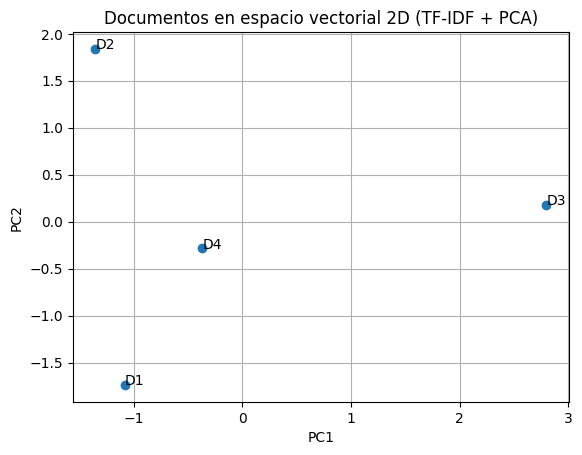

In [8]:
import matplotlib.pyplot as plt

plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

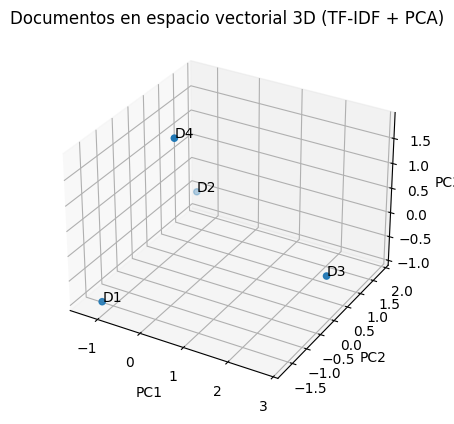

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D

# Supongamos que 'matriz' es tu matriz original de datos (features x documentos)
# Aplica PCA con 3 componentes
pca = PCA(n_components=3)
docs_3d = pca.fit_transform(matriz.T)  # Transponemos para que filas sean documentos

# Graficar en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2])

# Anotar documentos
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


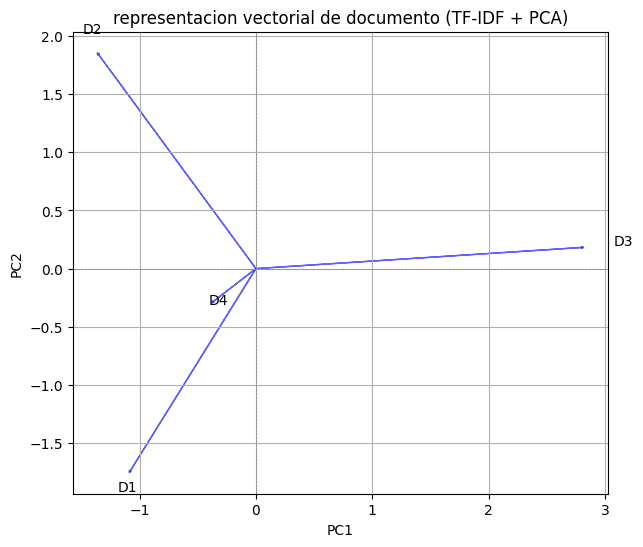

In [10]:
plt.figure(figsize=(10,6))
for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(x*1.1, y*1.1, f'D{i+1}', fontsize=10)

plt.title("representacion vectorial de documento (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

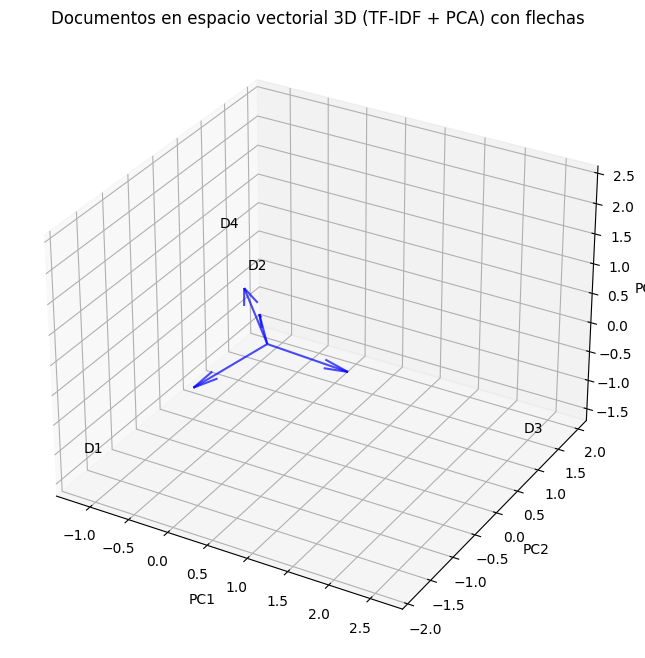

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D

# Supongamos que 'matriz' es tu matriz original (features x documentos)
# Aplica PCA con 3 componentes
pca = PCA(n_components=3)
docs_3d = pca.fit_transform(matriz.T)  # filas = documentos

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar flechas desde el origen hacia cada punto docs_3d
# Los vectores de origen son todos (0,0,0)
X = np.zeros(docs_3d.shape[0])
Y = np.zeros(docs_3d.shape[0])
Z = np.zeros(docs_3d.shape[0])

# Componentes vectoriales (dirección y magnitud)
U = docs_3d[:, 0]
V = docs_3d[:, 1]
W = docs_3d[:, 2]

# Graficar flechas
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=True, color='blue', alpha=0.7)

# Añadir etiquetas cerca del extremo de cada flecha
for i, (x, y, z) in enumerate(docs_3d):
    ax.text(x * 1.1, y * 1.1, z * 1.1, f'D{i+1}', fontsize=10)

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA) con flechas")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Opcional: ajustar límites para mejor visualización
max_range = np.array([U.max()-U.min(), V.max()-V.min(), W.max()-W.min()]).max() / 2.0
mid_x = (U.max()+U.min()) * 0.5
mid_y = (V.max()+V.min()) * 0.5
mid_z = (W.max()+W.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [12]:
def query(text):
    if len(documents) > 4:
        documents.pop(4)
    documents.append(text)

In [13]:
query('gato')
print (documents)

['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.', 'gato']


In [14]:
vocab = set()
for doc in documents:
    print(doc)
    for word in doc.lower().strip('.').split(sep=" "):
        vocab.add(word)

print(vocab)
print(len(vocab))

El gato se escondió debajo de la cama.
La cama estaba limpia y cómoda.
El perro y el gato jugaron en el jardín.
La limpieza del jardín es importante.
gato
{'jardín', 'debajo', 'cama', 'la', 'y', 'el', 'jugaron', 'es', 'del', 'de', 'limpieza', 'gato', 'importante', 'cómoda', 'limpia', 'en', 'perro', 'se', 'estaba', 'escondió'}
20


In [15]:
dict_tf = {}
i=0
for doc in documents:
    diccionario_tfd = {}
    for term in vocab:
        count =  doc.lower().strip('.').count(term) # no se usa el count
        diccionario_tfd[term] = count
    #print(documents, diccionario_tfd)
    dict_tf[i] = diccionario_tfd
    i += 1
print(dict_tf)

{0: {'jardín': 0, 'debajo': 1, 'cama': 1, 'la': 1, 'y': 0, 'el': 1, 'jugaron': 0, 'es': 1, 'del': 0, 'de': 2, 'limpieza': 0, 'gato': 1, 'importante': 0, 'cómoda': 0, 'limpia': 0, 'en': 0, 'perro': 0, 'se': 1, 'estaba': 0, 'escondió': 1}, 1: {'jardín': 0, 'debajo': 0, 'cama': 1, 'la': 1, 'y': 1, 'el': 0, 'jugaron': 0, 'es': 1, 'del': 0, 'de': 0, 'limpieza': 0, 'gato': 0, 'importante': 0, 'cómoda': 1, 'limpia': 1, 'en': 0, 'perro': 0, 'se': 0, 'estaba': 1, 'escondió': 0}, 2: {'jardín': 1, 'debajo': 0, 'cama': 0, 'la': 0, 'y': 1, 'el': 3, 'jugaron': 1, 'es': 0, 'del': 0, 'de': 0, 'limpieza': 0, 'gato': 1, 'importante': 0, 'cómoda': 0, 'limpia': 0, 'en': 1, 'perro': 1, 'se': 0, 'estaba': 0, 'escondió': 0}, 3: {'jardín': 1, 'debajo': 0, 'cama': 0, 'la': 1, 'y': 0, 'el': 1, 'jugaron': 0, 'es': 1, 'del': 1, 'de': 1, 'limpieza': 1, 'gato': 0, 'importante': 1, 'cómoda': 0, 'limpia': 0, 'en': 0, 'perro': 0, 'se': 0, 'estaba': 0, 'escondió': 0}, 4: {'jardín': 0, 'debajo': 0, 'cama': 0, 'la': 0, '

In [16]:
import pandas as pd
matriz = pd.DataFrame(dict_tf)
matriz.T

,jardín,debajo,cama,la,y,el,jugaron,es,del,de,limpieza,gato,importante,cómoda,limpia,en,perro,se,estaba,escondió
0,0,1,1,1,0,1,0,1,0,2,0,1,0,0,0,0,0,1,0,1
1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,1,3,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,0,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [17]:
from sklearn.decomposition import PCA

# Representación TF

# Representación TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-0.95446661,  1.89520337],
       [-1.33637501, -1.53300153],
       [ 2.85741119, -0.11229653],
       [-0.27572432,  0.5579659 ],
       [-0.29084526, -0.80787121]])

## Similitud coseno
La función devuelve un valor entre -1 y 1, donde 1 indica que los vectores son idénticos, 0 que son perpendiculares y -1 que tienen direcciones opuestas. 

In [18]:
import numpy as np

# Extraer vector consulta
query_vec = docs_2d[-1]

# Vectores documentos (todos excepto el último)
doc_vectors = docs_2d[:-1]

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calcular similitud consulta con cada documento
for i, doc_vec in enumerate(doc_vectors, start=1):
    sim = cosine_similarity(query_vec, doc_vec)
    print(f"Similitud coseno consulta - Documento {i}: {sim:.4f}")


Similitud coseno consulta - Documento 1: -0.6880
Similitud coseno consulta - Documento 2: 0.9318
Similitud coseno consulta - Documento 3: -0.3015
Similitud coseno consulta - Documento 4: -0.6934


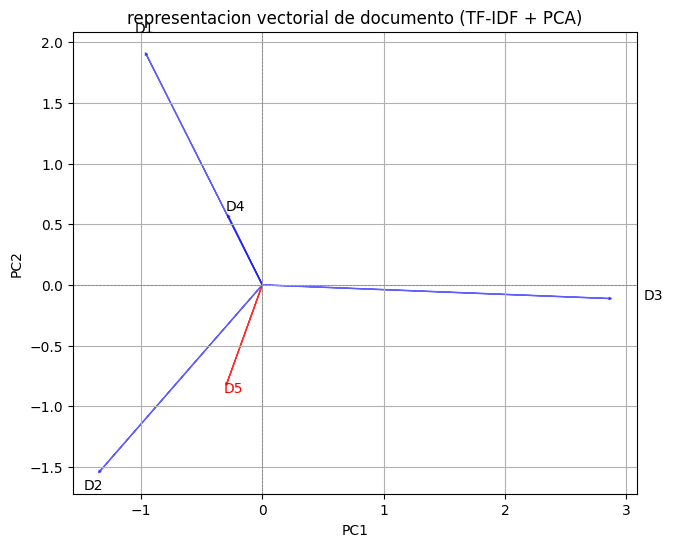

In [19]:
plt.figure(figsize=(10,6))
for i, (x,y) in enumerate(docs_2d):
    if i == len(docs_2d) - 1:
        # Última flecha en rojo
        plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='red', ec='red', alpha=0.8)
        plt.text(x*1.1, y*1.1, f'D{i+1}', fontsize=10, color='red')
    else:
        # Flechas anteriores en azul
        plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
        plt.text(x*1.1, y*1.1, f'D{i+1}', fontsize=10)

plt.title("representacion vectorial de documento (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [20]:
query('gato')
print (documents)

['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.', 'gato']


In [21]:
vocab = set()
for doc in documents:
    print(doc)
    for word in doc.lower().strip('.').split(sep=" "):
        vocab.add(word)

print(vocab)
print(len(vocab))

El gato se escondió debajo de la cama.
La cama estaba limpia y cómoda.
El perro y el gato jugaron en el jardín.
La limpieza del jardín es importante.
gato
{'jardín', 'debajo', 'cama', 'la', 'y', 'el', 'jugaron', 'es', 'del', 'de', 'limpieza', 'gato', 'importante', 'cómoda', 'limpia', 'en', 'perro', 'se', 'estaba', 'escondió'}
20


In [22]:
dict_tf = {}
i=0
for doc in documents:
    diccionario_tfd = {}
    for term in vocab:
        count =  doc.lower().strip('.').count(term) # no se usa el count
        diccionario_tfd[term] = count
    #print(documents, diccionario_tfd)
    dict_tf[i] = diccionario_tfd
    i += 1
print(dict_tf)

{0: {'jardín': 0, 'debajo': 1, 'cama': 1, 'la': 1, 'y': 0, 'el': 1, 'jugaron': 0, 'es': 1, 'del': 0, 'de': 2, 'limpieza': 0, 'gato': 1, 'importante': 0, 'cómoda': 0, 'limpia': 0, 'en': 0, 'perro': 0, 'se': 1, 'estaba': 0, 'escondió': 1}, 1: {'jardín': 0, 'debajo': 0, 'cama': 1, 'la': 1, 'y': 1, 'el': 0, 'jugaron': 0, 'es': 1, 'del': 0, 'de': 0, 'limpieza': 0, 'gato': 0, 'importante': 0, 'cómoda': 1, 'limpia': 1, 'en': 0, 'perro': 0, 'se': 0, 'estaba': 1, 'escondió': 0}, 2: {'jardín': 1, 'debajo': 0, 'cama': 0, 'la': 0, 'y': 1, 'el': 3, 'jugaron': 1, 'es': 0, 'del': 0, 'de': 0, 'limpieza': 0, 'gato': 1, 'importante': 0, 'cómoda': 0, 'limpia': 0, 'en': 1, 'perro': 1, 'se': 0, 'estaba': 0, 'escondió': 0}, 3: {'jardín': 1, 'debajo': 0, 'cama': 0, 'la': 1, 'y': 0, 'el': 1, 'jugaron': 0, 'es': 1, 'del': 1, 'de': 1, 'limpieza': 1, 'gato': 0, 'importante': 1, 'cómoda': 0, 'limpia': 0, 'en': 0, 'perro': 0, 'se': 0, 'estaba': 0, 'escondió': 0}, 4: {'jardín': 0, 'debajo': 0, 'cama': 0, 'la': 0, '

In [23]:
import pandas as pd
matriz = pd.DataFrame(dict_tf)
matriz.T

,jardín,debajo,cama,la,y,el,jugaron,es,del,de,limpieza,gato,importante,cómoda,limpia,en,perro,se,estaba,escondió
0,0,1,1,1,0,1,0,1,0,2,0,1,0,0,0,0,0,1,0,1
1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,1,3,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,0,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-0.95446661,  1.89520337],
       [-1.33637501, -1.53300153],
       [ 2.85741119, -0.11229653],
       [-0.27572432,  0.5579659 ],
       [-0.29084526, -0.80787121]])

In [25]:
import numpy as np

def documentos_mas_relevantes(query_vec, doc_vectors, top_k=3, umbral=0.0):
    similitudes = [
        (i, np.dot(query_vec, doc_vec) / (np.linalg.norm(query_vec) * np.linalg.norm(doc_vec)))
        for i, doc_vec in enumerate(doc_vectors, start=1)
    ]
    
    # Filtrar documentos con similitud menor o igual al umbral (por defecto 0)
    similitudes_filtradas = [(i, sim) for i, sim in similitudes if sim > umbral]
    
    # Ordenar descendientemente
    similitudes_ordenadas = sorted(similitudes_filtradas, key=lambda x: x[1], reverse=True)
    
    # Devolver top_k documentos
    return similitudes_ordenadas[:top_k]

In [26]:
query_vec = docs_2d[-1]
doc_vectors = docs_2d[:-1]

# Top 2
resultados = documentos_mas_relevantes(query_vec, doc_vectors, top_k=2)
print("Documentos más relevantes:")
for doc_idx, sim in resultados:
    print(f"Documento {doc_idx}: Similitud {sim:.4f}")

Documentos más relevantes:
Documento 2: Similitud 0.9318


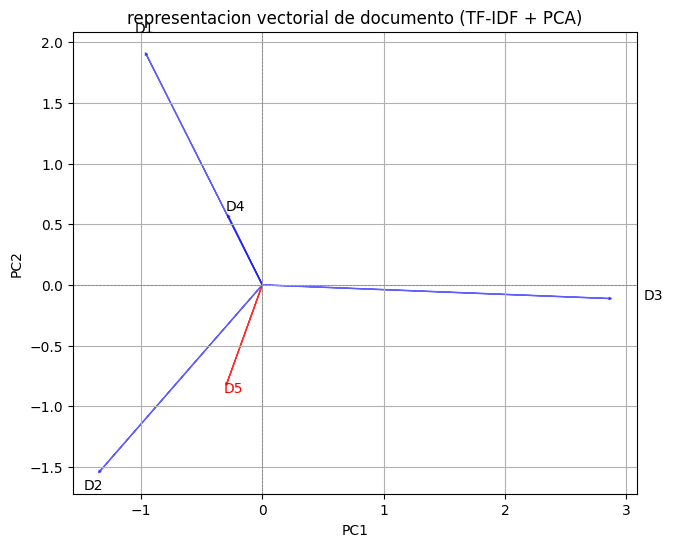

In [27]:
plt.figure(figsize=(10,6))
for i, (x,y) in enumerate(docs_2d):
    if i == len(docs_2d) - 1:
        # Última flecha en rojo
        plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='red', ec='red', alpha=0.8)
        plt.text(x*1.1, y*1.1, f'D{i+1}', fontsize=10, color='red')
    else:
        # Flechas anteriores en azul
        plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
        plt.text(x*1.1, y*1.1, f'D{i+1}', fontsize=10)

plt.title("representacion vectorial de documento (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()